In [ ]:
# Incorporating TAP into equations

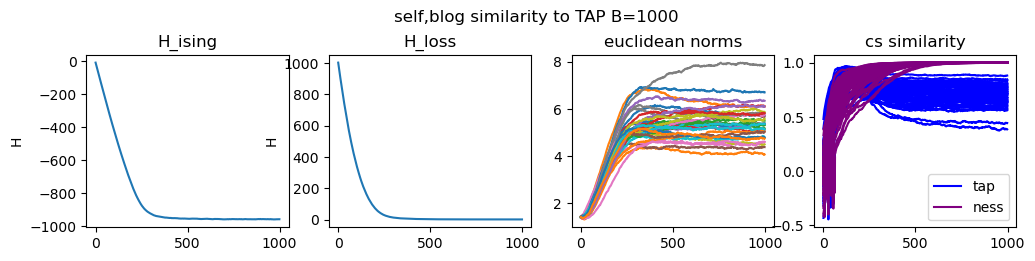

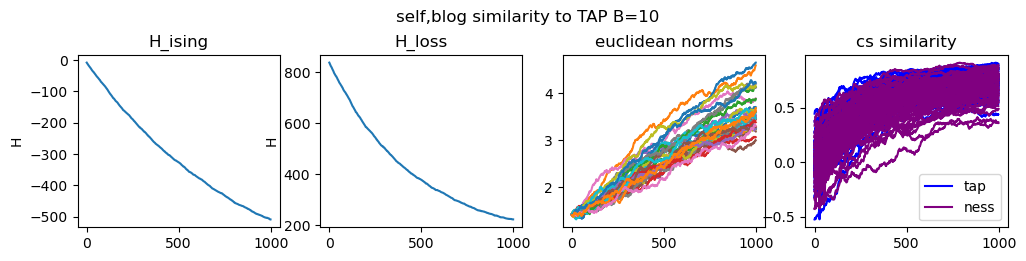

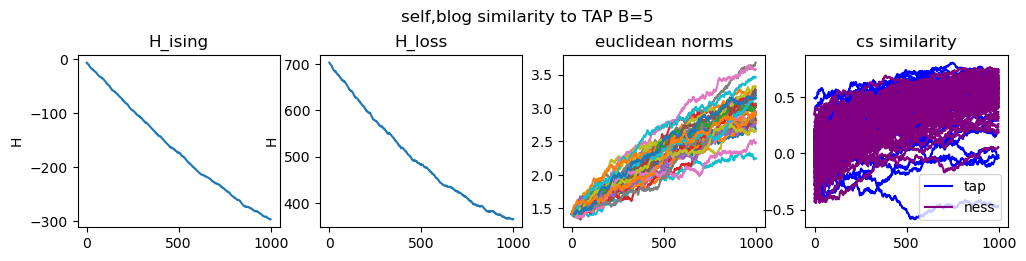

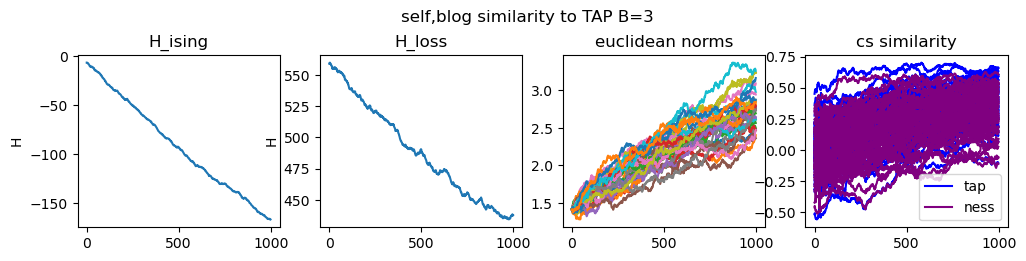

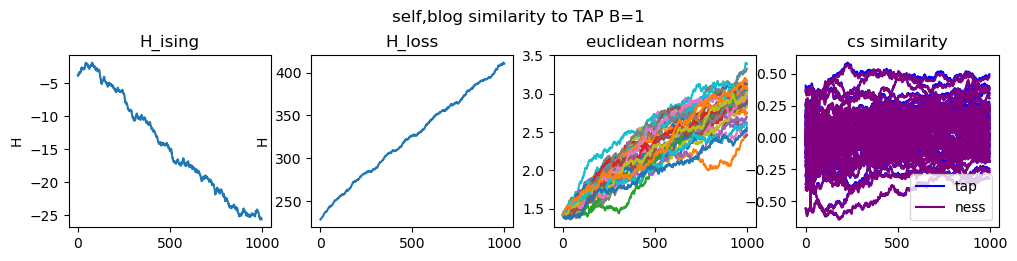

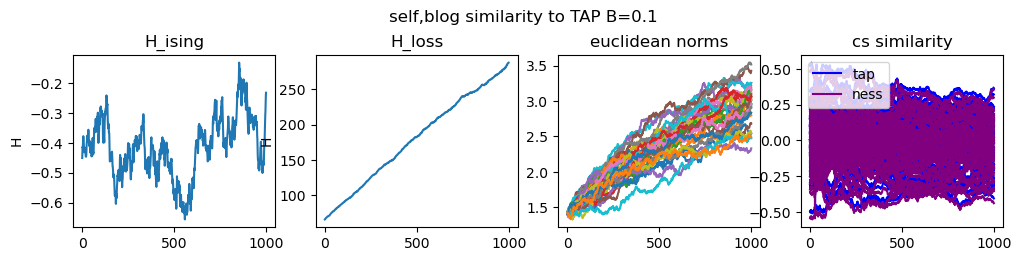

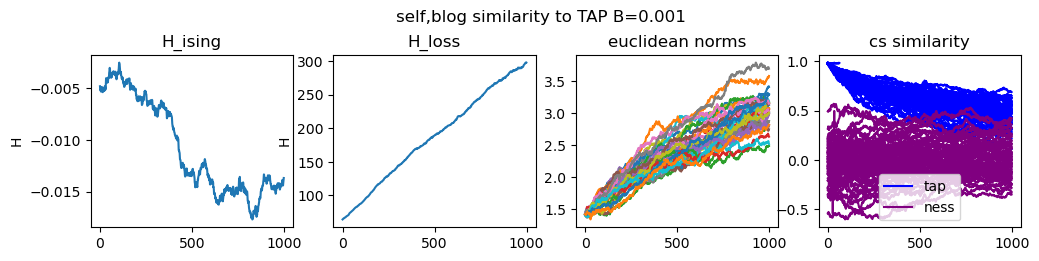

In [14]:
from VectorMC import *
for B in [1000,10,5,3,1,0.1,0.001]:
    model = VectorSpinMC(B=B,attn_norm='blog')
    m_states = model.long_run(1)
    model.plot_TEs0(m_states, f"self,blog similarity to TAP B={B}", tap=True)

In [17]:
from matplotlib import cm
def plot_TAPs(Bs):
    steps = 100
    N,D = 64,32
    x0,J,m0 = load_generic_xJM(N,D)
    plt.figure(figsize=(6,4))
    colors = [cm.jet(x) for x in np.linspace(1.0, 0.0, len(Bs)) ]
    for i,B in enumerate(Bs):
        jsteps = jnp.arange(0, steps)
        mtap_hist = jaxtap(jnp.array(x0),jnp.array(J),jnp.array([m0]),jsteps,B,(D / 2 - 1) ** 0.5)
        y_tap_m_buffer = jnp.zeros_like(mtap_hist[:, :, :, 0])
        for step in jsteps:
            if step == 0:
                y_tap_m_buffer = y_tap_m_buffer.at[step].set(optax.cosine_similarity(mtap_hist[0], mtap_hist[0]))
            else:
                y_tap_m_buffer = y_tap_m_buffer.at[step].set(optax.cosine_similarity(mtap_hist[step - 1], mtap_hist[step]))
        plt.plot(jsteps[1:],y_tap_m_buffer.squeeze()[1:].mean(axis=-1),label=f"B={B}",color=colors[i],alpha=0.8)
    plt.title(f'TAP cossim m(t-1)')
    plt.subplots_adjust(right=0.8)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

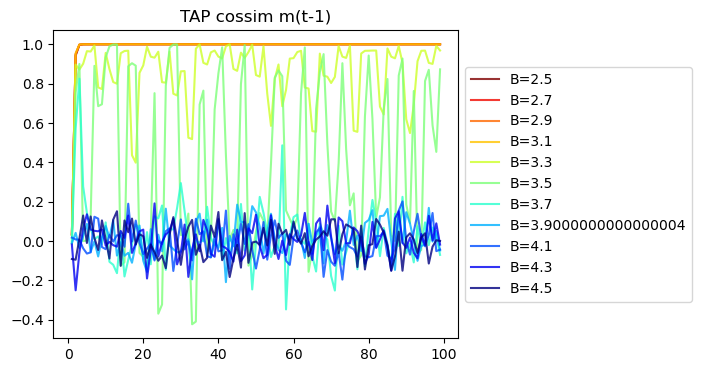

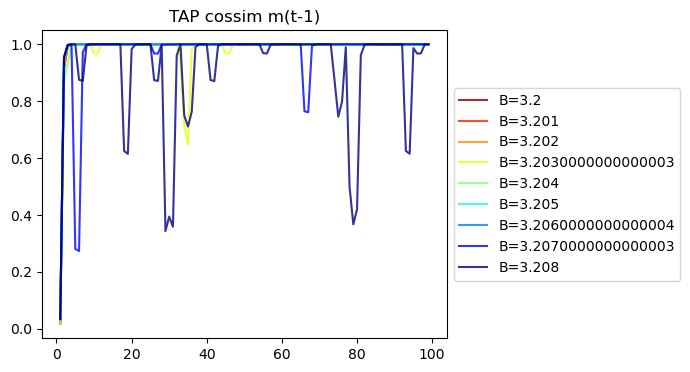

In [18]:
plot_TAPs(Bs = np.linspace(2.5,4.5,11))
plot_TAPs(Bs = np.linspace(3.200,3.208,9))

In [20]:
def CS_tapness(Bs):
    steps = 100
    N,D = 64,32
    x0,J,m0 = load_generic_xJM(N,D)
    plt.figure(figsize=(6,4))
    colors = [cm.jet(x) for x in np.linspace(1.0, 0.0, len(Bs)) ]
    for i,B in enumerate(Bs):
        jsteps = jnp.arange(0, steps)

        _, stacked_outputs_naive = simulate(jnp.array(x0),jnp.array(J),jnp.array([m0]),jsteps,B,(D / 2 - 1) ** 0.5, update_fun=update_naive_mf)
        y_naive = stacked_outputs_naive.transpose((1, 0, 2, 3))

        mtap_hist = jaxtap(jnp.array(x0),jnp.array(J),jnp.array([m0]),jsteps,B,(D / 2 - 1) ** 0.5)
        y_tap_m_buffer = jnp.zeros_like(mtap_hist[:, :, :, 0])
        # y_tap_x_buffer = jnp.zeros_like(mtap_hist[:, :, :, 0])
        # y_naive_x_buffer = jnp.zeros_like(mtap_hist[:, :, :, 0])
        for step in jsteps:
            y_tap_m_buffer = y_tap_m_buffer.at[step].set(optax.cosine_similarity(y_naive[step], mtap_hist[step]))
            # y_tap_x_buffer = y_tap_x_buffer.at[step].set(optax.cosine_similarity(jnp.array(x0), mtap_hist[step]))
            # y_naive_x_buffer = y_naive_x_buffer.at[step].set(optax.cosine_similarity(jnp.array(x0), y_naive[step]))
        plt.plot(jsteps[1:],y_tap_m_buffer.squeeze()[1:].mean(axis=-1),label=f"B={B}",color=colors[i],alpha=0.8)
        # plt.plot(jsteps[1:],y_tap_x_buffer.squeeze()[1:].mean(axis=-1),label=f"tapx")
        # plt.plot(jsteps[1:],y_naive_x_buffer.squeeze()[1:].mean(axis=-1),label=f"nessx")
    plt.title(f'TAP cossim nMF')
    plt.subplots_adjust(right=0.8)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

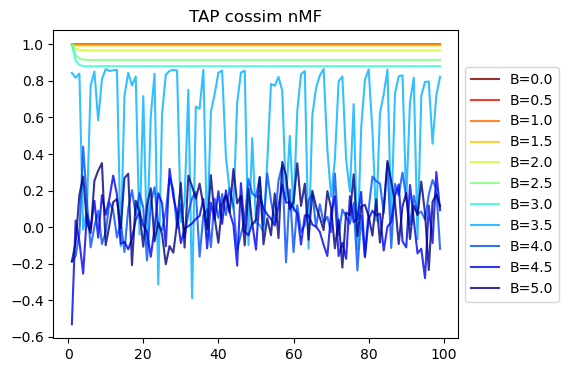

In [21]:
CS_tapness(Bs = np.linspace(0,5,11))